## **CSC 2515 : Introduction to Machine Learning**
### HOMEWORK-2
----

### Collaborators:

Name | Student ID | E-mail 
--- | --- | --- 
Bhagyashree Keswani| 1006790849 | bhagyashree.keswani@mail.utoronto.ca 
Dhavalkumar Patel |1007542777 | dhaval.patel@mail.utoronto.ca

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, d2_tweedie_score, mean_squared_error

from tqdm import tqdm
import autograd.numpy as npy
import autograd
import pickle
import seaborn as sns

## 1. Bias and Variance Decomposition for the L2-regularized Mean Estimator; 

**Visualizing the effect of bias and variance on the expected squared error:**

In [ ]:
def define_bias(lam, mu):
    return ((lam*mu)/(lam+1))**2

def define_var(sig, lam, n):
    return (1/n)*(sig/(lam+1))**2

def plot_(lam_set, mu_set, n_set, sig_set):

    i=0
    for mu in mu_set:
      for sig in sig_set:
        for n in n_set:
          bias = []
          var = []
          est = []
          for lam in lam_set:
            b_temp = define_bias(lam, mu)
            v_temp = define_var(sig, lam, n)
            e_temp = b_temp + v_temp

            bias.append(b_temp)
            var.append(v_temp)
            est.append(e_temp)
          
          i+=1
          fig, ax = plt.subplots(figsize=(6, 3))
          ax.plot(lam_set, bias, label = "Bias", marker='o')
          ax.plot(lam_set, var, label = "Variance", marker='x')
          ax.plot(lam_set, est, label = "Error", marker='.') 
          plt.legend()
          plt.title("Figure: {}-Lambda versus Bias, Variance and Error for mu: {}, sigma: {} and n: {}".format(i,mu,sig,n))
          plt.xlabel("Lambda")
          plt.ylabel("Bias, Variance and Error")
          plt.xscale("log")
          plt.show()     

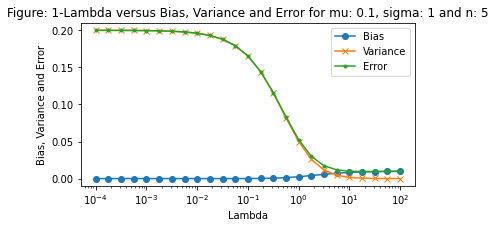

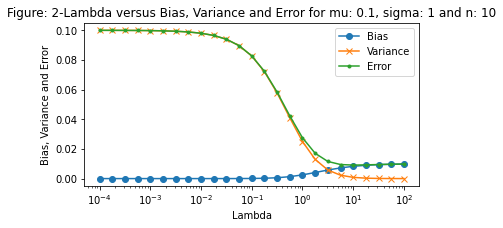

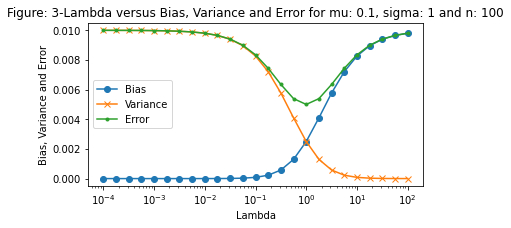

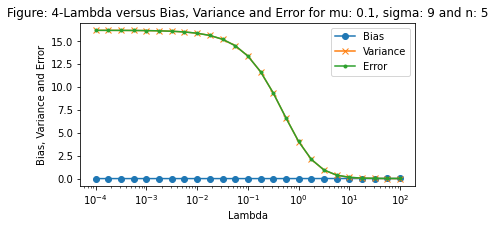

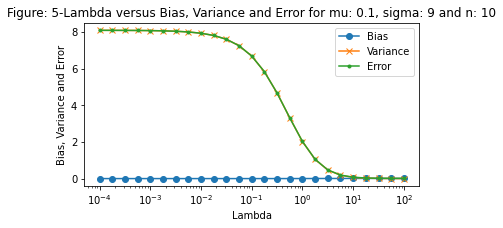

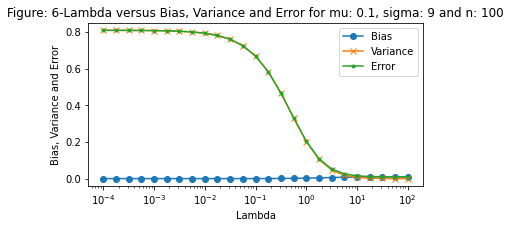

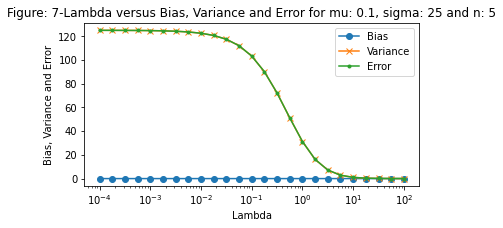

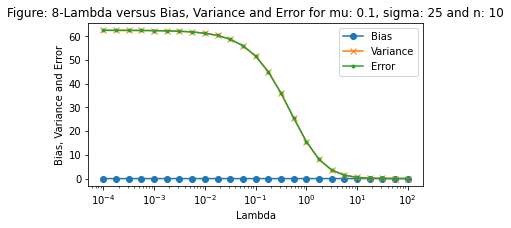

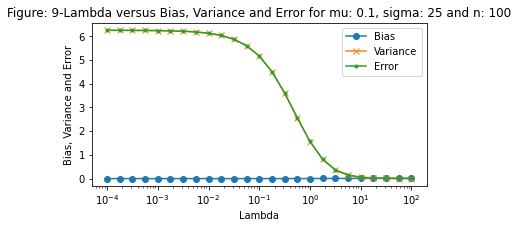

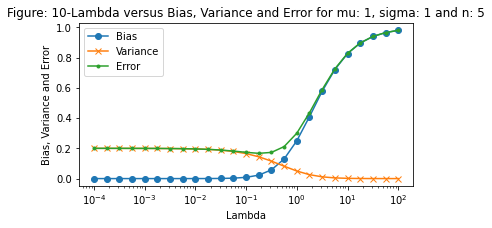

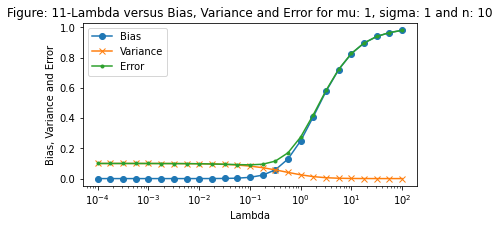

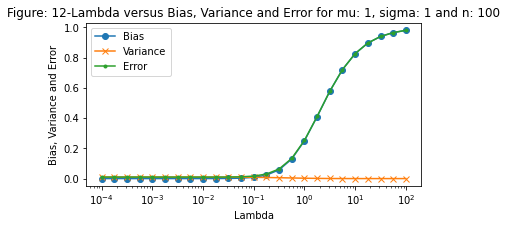

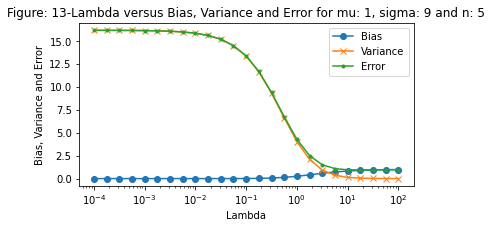

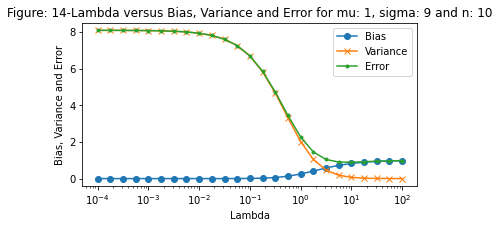

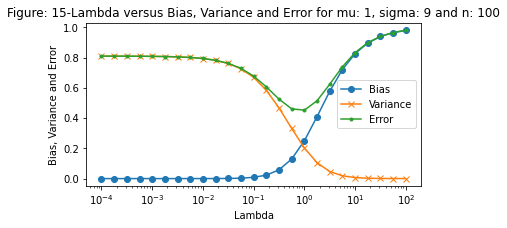

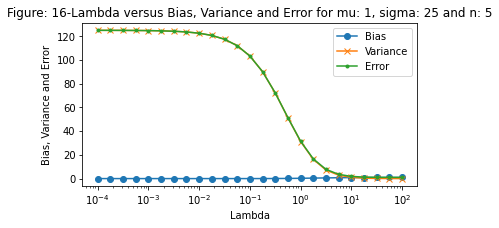

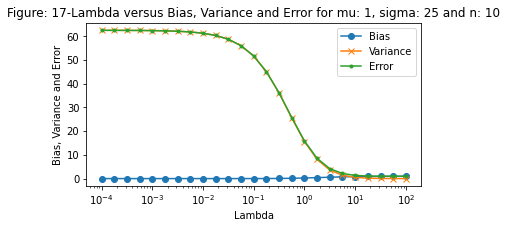

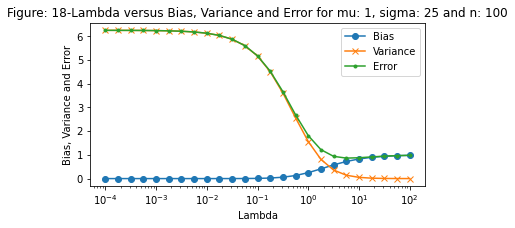

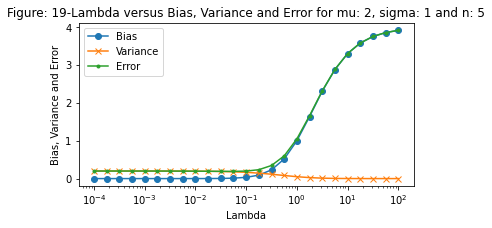

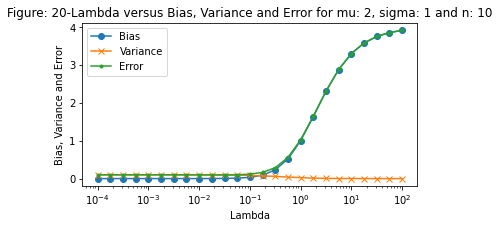

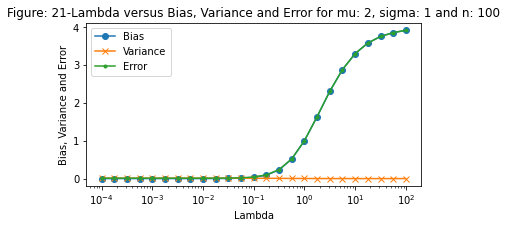

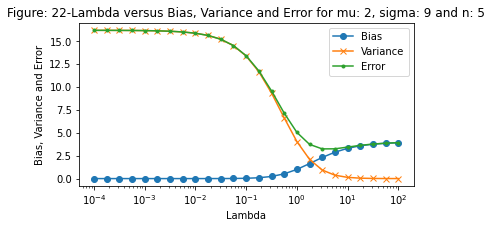

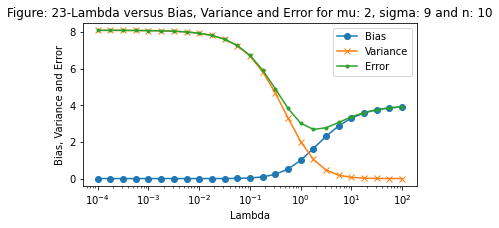

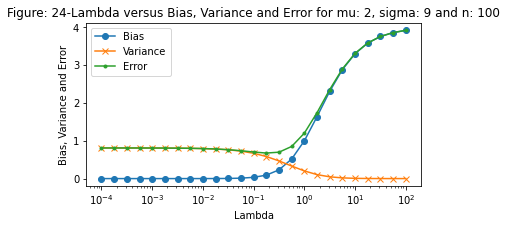

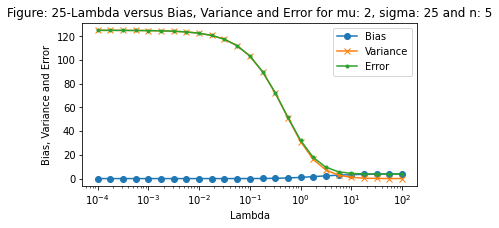

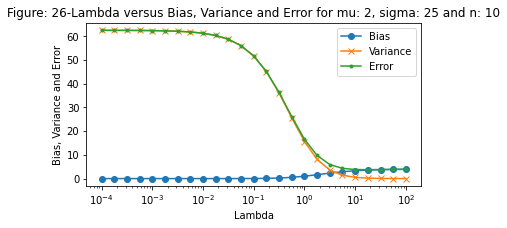

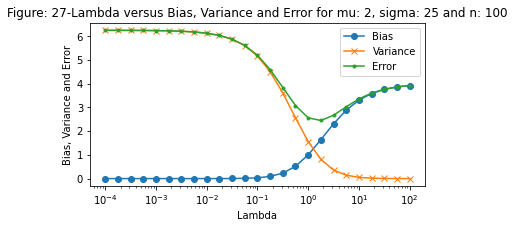

In [ ]:
mu_set = [0.1, 1, 2]
sig_set = [1, 9, 25]
n_set = [5, 10, 100]
lam_set = np.logspace(-4,2, 25)
plot_(lam_set, mu_set, n_set, sig_set)

**Inferences from the above graphs:**

**Figures 1 to 3 (mu=[0.1,0.1,0.1], sigma=[1,1,1], n=[5,10,100]):**

- **When lambda is less than 0.1 and mu and sigma are constant with both having small values:** 
Increasing n decreases the variance proportionately. That is, when n=5, variance and error are around 0.2 ; likewise when n=100, they are around 0.01. The values remain almost constant from lambda=[1e-4, 1e-1]. For these lambda , bias remains 0 and n has no effect on it as bias does not have n in its equation. The error is clearly dominated by variance and remains high.
- **When lambda is greater than 0.1 and mu and sigma are constant with both having small values:** 
For n=5 and 10, similar pattern is observed with variance and error decreasing and bias slightly increasing with increasing lambda. For lambda>10, variance approaches 0. However, when n=100, bias and error are much higher compared to variance. The model in such a scenario would likely underfit.The error is dominated by bias in this case.

- **It can be concluded that for lower values of lambda, model may overfit(low bias, high variance) and the variance contributed majorly to the error whereas for higher values, it may underfit(high bias, low variance) and the bias contributed majorly to the error. Also, increasing the number of samples(n) increases the variance of the model.** 

**Figures 4 to 9 (mu=[0.1,0.1,0.1,0.1,0.1,0.1], sigma=[9,9,9,25,25,25], n=[5,10,100,5,10,100]):**

- A similar pattern is observed in these graphs. Higher values of sigma lead to higher ranges of variance and error for different lambda's whereas higher values of n correspond to lower variance and error. Lambda values greater than 10 result in 0 bias and 0 variance. Thus, increasing sigma and n have no effect on variance once lambda reaches 10.

- **It can be concluded that for lower lambda values, the model shall overfit. Also, when mu is a very small value while sigma is large, the error is mainly caused due the high variance when regularization parameter is low.**

**Figures 10 to 12 (mu=[1,1,1], sigma=[1,1,1], n=[5,10,100]):**

- For lower values of lambda, bias remains 0 whereas variance is approximately constant. Error remains same as variance. As lmbda increses from 1, variance approaches 0 while bias increases considerably. Error and bias graphs overlap in this case.

**Figures 13 to 18 (mu=[1,1,1,1,1,1], sigma=[9,9,9,25,25,25], n=[5,10,100,5,10,100]):**

- Similar pattern observed as above.

**Figures 19 to 21 (mu=[2,2,2], sigma=[1,1,1], n=[5,10,100]):**

- For same sigma and n values, when mu is increased from 1 to 2, bias has higher range of values for lambda>1. This leads to error being high too. Variance is very low for all lambda's and approaches 0 for lambda>1. For n=100, variance is around 0 for all lambda values. Thus, when mu and n are large and sigma and lambda is low, bias is the one that mostly contributes to the error.

**Figures 22 to 27 (mu=[2,2,2,2,2,2], sigma=[9,9,9,25,25,25], n=[5,10,100,5,10,100]):**

- Similar pattern observed as above.







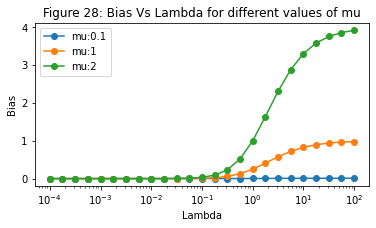

In [ ]:
mu_set = [0.1, 1, 2]
lam_set = np.logspace(-4,2, 25)
fig, ax = plt.subplots(figsize=(6, 3))
for mu in mu_set:
  b_t = []
  leg= "mu:{}".format(mu)
  for lam in lam_set:
    b_temp = define_bias(lam, mu)
    b_t.append(b_temp)
    
  ax.plot(lam_set, b_t, label=leg, marker='o')
  plt.xlabel("Lambda")
  plt.ylabel("Bias")
  plt.title('Figure 28: Bias Vs Lambda for different values of mu')
  plt.legend()
  plt.xscale("log")
plt.show() 

**Inferences from Figure 28:**

This figure studies the effect of different mu's on bias with increasing lambda. Increasing mu increases bias more rapidly when lambda increases from 1. For lower lambda's, mu has no effect on bias. Thus, in geenral, mu should preferable have low value.



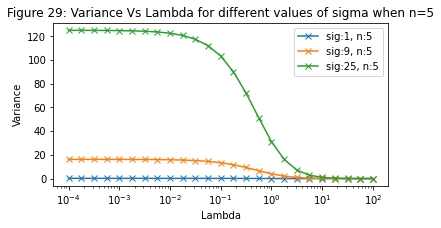

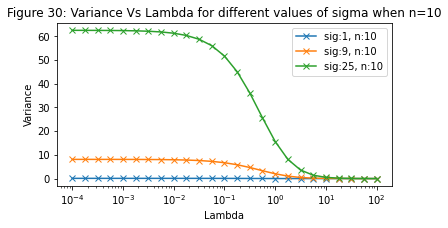

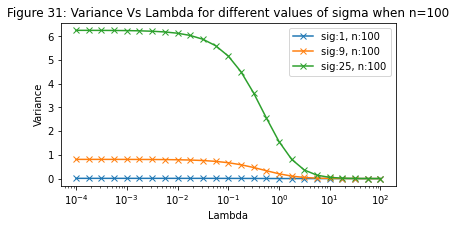

In [ ]:
sig_set = [1, 9, 25]
n_set = [10, 50, 100]
lam_set = np.logspace(-4,2, 25)

fig, ax = plt.subplots(figsize=(6, 3))

for sig in sig_set:
  n=5
  leg= "sig:{}, n:{}".format(sig,n)
  var = []
  est = []
  for lam in lam_set:
    v_temp = define_var(sig, lam, n)
    var.append(v_temp)
    
  plt.plot(lam_set, var, label = leg, marker='x')
  plt.xlabel("Lambda")
  plt.ylabel("Variance")
  plt.title('Figure 29: Variance Vs Lambda for different values of sigma when n=5')
  plt.legend()
  plt.xscale("log")
plt.show()   

sig_set = [1, 9, 25]
n_set = [10, 50, 100]
lam_set = np.logspace(-4,2, 25)

fig, ax = plt.subplots(figsize=(6, 3))

for sig in sig_set:
  n=10
  leg= "sig:{}, n:{}".format(sig,n)
  var = []
  est = []
  for lam in lam_set:
    v_temp = define_var(sig, lam, n)
    var.append(v_temp)
    
  plt.plot(lam_set, var, label = leg, marker='x')
  plt.xlabel("Lambda")
  plt.ylabel("Variance")
  plt.title('Figure 30: Variance Vs Lambda for different values of sigma when n=10')
  plt.xscale("log")
  plt.legend()
plt.show()  

sig_set = [1, 9, 25]
n_set = [10, 50, 100]
lam_set = np.logspace(-4,2, 25)

fig, ax = plt.subplots(figsize=(6, 3))

for sig in sig_set:
  n=100
  leg= "sig:{}, n:{}".format(sig,n)
  var = []
  est = []
  for lam in lam_set:
    v_temp = define_var(sig, lam, n)
    var.append(v_temp)
    
  plt.plot(lam_set, var, label = leg, marker='x')
  plt.xlabel("Lambda")
  plt.ylabel("Variance")
  plt.title('Figure 31: Variance Vs Lambda for different values of sigma when n=100')
  plt.xscale("log")
  plt.legend()
plt.show()  


**Inferences from Figure 29 t0 31:**

These figures study the effect of sigma and n on variance for different lambda's. For lambda>10, they have no effect on variance. However, when lambda>1, variance is almost a constant value and this value increases as sigma increases. The constant variance value reduces as n increases.



### CONCLUSION:

**- Finally, after observing all the graphs we can say that in general lower values of lambda (<1) correspond to higher variance and lower bias and variance contributes more towards the error. This is because the model is too complex and is not penalized much.[OVERFITTING IN THIS CASE]**

**- Higher values of lambda (>1) correspond to lower variance and higher bias. Bias mostly contributes towards the error as the model is penalized a lot. Most of the features have been shrinked and the model is too simple leading to high error.[UNDERFITTING IN THIS CASE]**

**- n and variance are inversely related.**

**- Increasing mu increases the bias and error at a faster rate for lambda>1.**

**- Increase in sigma increases variance and error for lower lambda values.**

## 3.1. Initial data analysis – 15 pts.

**(a) [0pt] Load the Capital Bikesharing Dataset from the downloaded hour.csv file as a pandas
dataframe.**

In [3]:
df=pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**(b) [2pt] Describe and summarize the data in terms of number of data points, dimensions, and
used data types.**

In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Describing the data:

The dataset has the hourly and daily count of bikes rented between 2011 and 2012 along with 
- the corresponding weather information like weathersit, temp, atemp, hum, windspeed
- number of users- both casual and registered.
- Other information related to the day specifically: Whether the day is a holiday, day of the week, working day or not.
- Target column is 'cnt'.

|Categorical features| Numerical features|
|---|---|
|season|temp|
|yr|atemp|
|mnth|hum|
|hr|windspeed|
|holiday|casual|
|weekday|registered|
|workingday|instant|
|weathersit|

Note: 'dtedate' is an object and is neither a categorical nor a numerical features.



### Summarizing the data:

- Number of data points: 17379
- Dimensions: There are 16 features and one target column. The data has no null values.
- Used data types: Integer for categorical features, float and integer for continuous features, object for date and integer for target column.

**(c) [5pt] Present a single grid containing plots for each feature against the target. Choose the
appropriate axis for dependent vs. independent variables.
Hint: use the pyplot.tight_layout function to make your grid readable.**

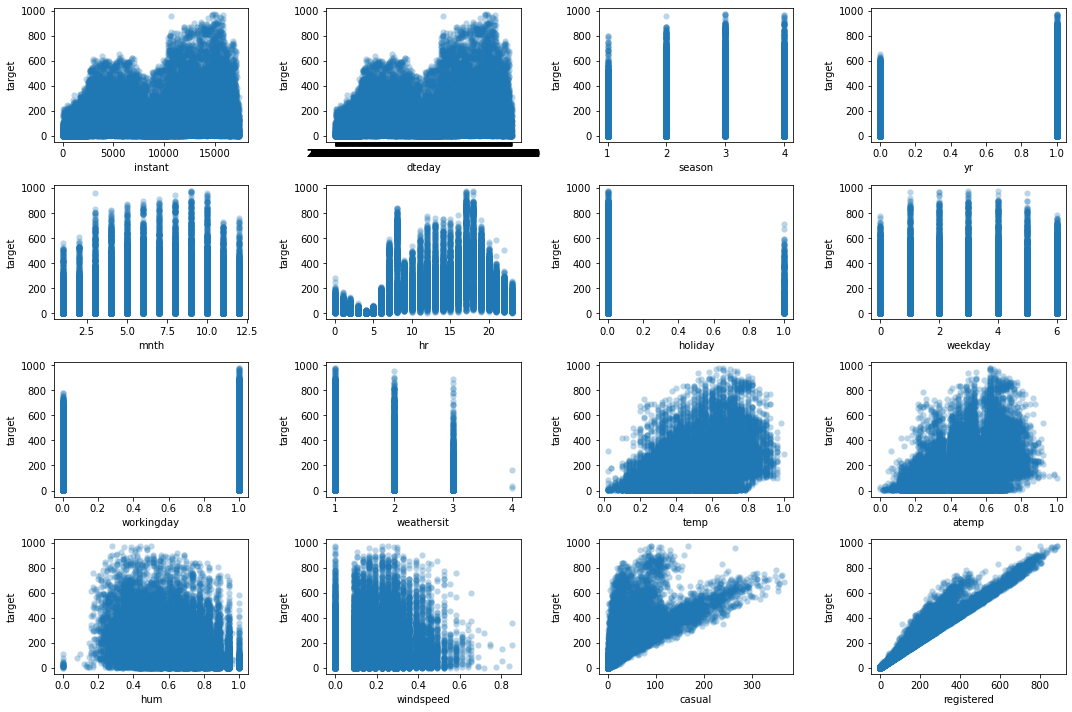

In [ ]:
features = df.drop('cnt', axis=1)
target = df.cnt
feature_names = df.iloc[:,:-1].columns.tolist()  

plt.figure(figsize=(15, 10))
for i in range(features.shape[1]):
  plt.subplot(4,4, i + 1)
  plt.xlabel(feature_names[i]) 
  plt.ylabel('target')  
  plt.scatter(features.iloc[:,i],target,linewidths=.1,alpha=0.3) 
plt.tight_layout()
plt.show()

**(d) [5pt] Perform a correlation analysis on the data and plot the correlation matrix as a colored
image. State which feature is the most positively, most negatively, and least correlated with
the target column cnt.**

Text(159.0, 0.5, 'Features')

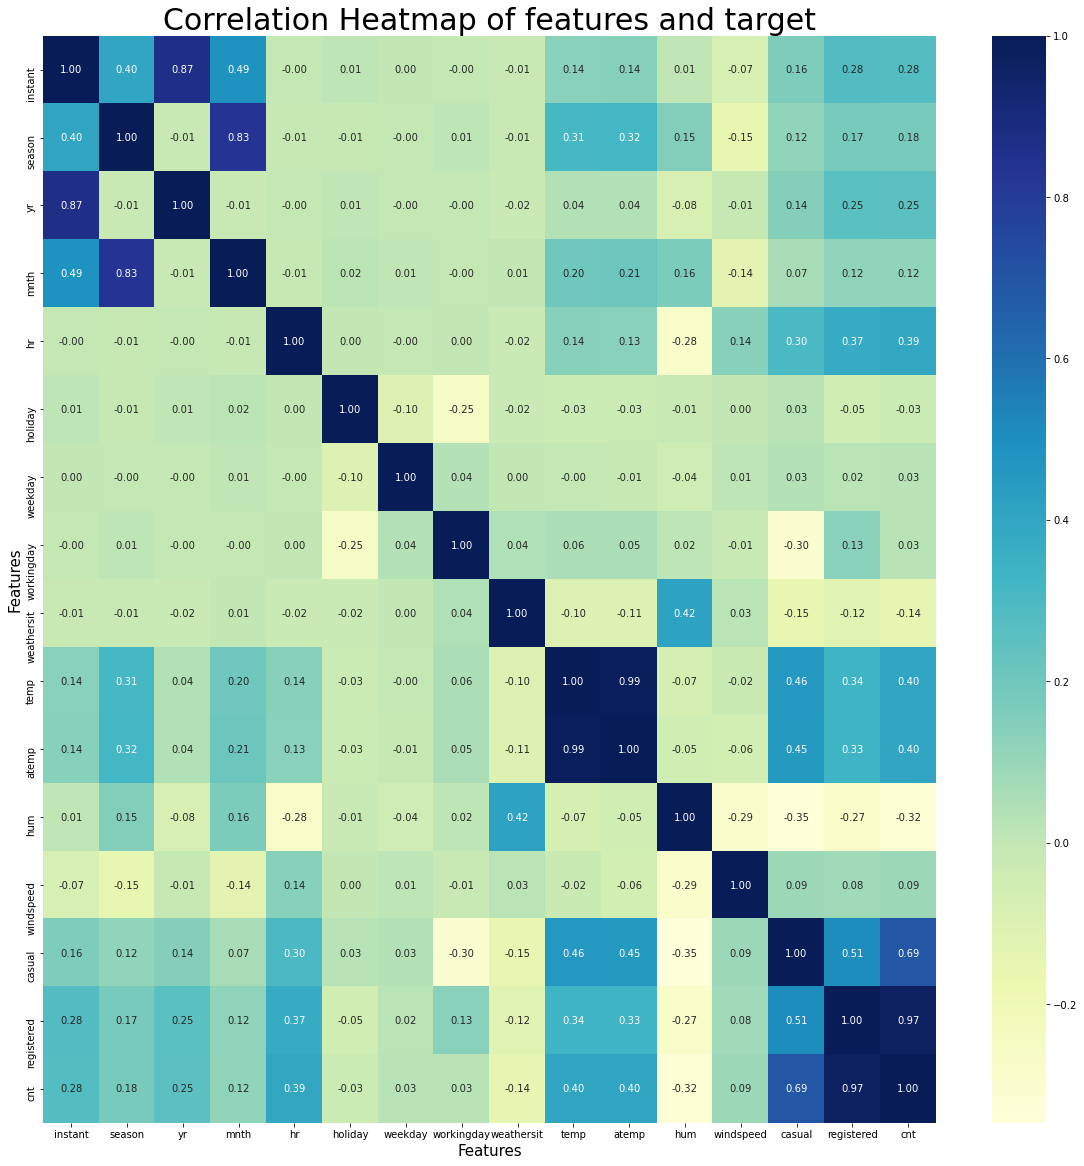

In [ ]:
#get correlations of each features in dataset
cor_matrix = df.corr()
cor_features = cor_matrix.index
plt.figure(figsize=(20,20))

#Correlation with output variable
cor_target = abs(df['cnt'])

# ploting heat map
g=sns.heatmap(cor_matrix,annot=True,fmt='.2f', cmap="YlGnBu")
g.set_title("Correlation Heatmap of features and target", fontsize=30)
g.set_xlabel("Features",fontsize=15)
g.set_ylabel("Features",fontsize=15)

**Printing the pairs of features most positively and negatively correlated with each other:**

In [36]:
print('The features most negatively correlated with each other are:')
print(df.corr().unstack().sort_values().drop_duplicates()[:5])
print('\nThe features most positively correlated with each other are:')
df.corr().unstack().sort_values().drop_duplicates()[-7:-2]

The features most negatively correlated with each other are:
hum     casual       -0.347028
        cnt          -0.322911
casual  workingday   -0.300942
hum     windspeed    -0.290105
hr      hum          -0.276498
dtype: float64

The features most positively correlated with each other are:


casual   registered    0.506618
         cnt           0.694564
season   mnth          0.830386
instant  yr            0.866014
cnt      registered    0.972151
dtype: float64

**Correlation of all features with the target:**

In [41]:
df.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [42]:
abs(df.corr()['cnt']).sort_values()[:3]

weekday       0.026900
workingday    0.030284
holiday       0.030927
Name: cnt, dtype: float64

**- Feature most positively correlated with the target column cnt: 'registered'** 

**- Feature most negatively correlated with the target column cnt: 'hum'** 

**- Feature least correlated with the target column cnt: 'weekday'** 


**(e) [1pt] Drop the following columns from the dataframe: instant, atemp, registered, casual,
dteday.**

In [26]:
df.drop(['instant','atemp', 'registered', 'casual', 'dteday'], axis=1, inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

**(f) [2pt] Shuffle the dataframe’s rows using sklearn.utils.shuffle with random state 0.
Split the data into a training set and a test set on index 10000.**

In [27]:
df_shuffle = shuffle(df, random_state=0)

train_df = df_shuffle[:10000]
train_features = train_df.iloc[:,:-1].values
train_labels = train_df.iloc[:,-1].values

test_df = df_shuffle[10000:]
test_features = test_df.iloc[:,:-1].values
test_labels = test_df.iloc[:,-1].values

## 3.2. Regression implementations – 40 pts.

**(a) [5pt] Implement the ordinary least squares regression algorithm as discussed in class. You
are free to implement the closed form solution.**

In [28]:
def hw2_ols(x_test, y_test, x_train, y_train):
    
    XtX = np.matmul(x_train.T, x_train)  #(11,10000)*(10000,11) = (11,11)
    
    XTt = np.matmul(x_train.T, y_train)   #(11,10000)*(10000,1) = (11,1)

    w = np.linalg.solve(XtX,XTt)          #(11,11*11,1 = 11,1)

    y_hat = np.dot(x_test, w)          

    return y_hat, w

**(b) [3pt] Fit the ordinary least squares regression model to the pre-processed data. Report
the coefficient of determination, also known as the R2
score, of your model. The R2
score
between the correct target labels y and the predicted target labels ˆy can be calculated as:**

Hint: you may use sklearn.metrics.r2 score.


In [ ]:
#adding bias to the train set for making predictions later
train_features_b = np.insert(train_features,0,values=np.ones(train_features.shape[0]),axis=1)
test_features_b = np.insert(test_features,0,values=np.ones(test_features.shape[0]),axis=1)

#fitting the model and getting r2 score on test set
y_pred_ols, w_ols_no = hw2_ols(test_features_b, test_labels, train_features_b, train_labels)
print("R2 Score for OLS before encoding: ", r2_score(test_labels, y_pred_ols))

R2 Score for OLS before encoding:  0.37686951524400425


**The R2 score for OLS before encoding is 0.3769.**

**(c) [5pt] You will find that the fit of the model is not very good. This is in part due to the fact
that the dataset contains categorical input variables. So far, your implementation uses these
categorical features as continuous inputs, which leads to not so good performance. Instead, it
is advised to explicitly encode these input variables as categorical variables. Recall that one
way of dealing with categorical variables is to replace them with 1-hot-encoded vectors. The
following columns in the dataframe are known to be categorical: season, mnth, hr, weekday,
weathersit. Substitute these features with 1-hot-encoded vectors in the dataframe. Use this
dataframe for all upcoming questions. Make sure that you split the dataframe as described
in Question 3.1 (f).
Hint: use pandas.get dummies.**

In [30]:
#Encoding the categorical features
df_encode = pd.get_dummies(df_shuffle, columns = ['season', 'mnth', 'hr', 'weekday', 'weathersit'])

column_to_move = df_encode.pop("cnt")
df_encode.insert(0, "cnt", column_to_move)

#Train data
train_df_en = df_encode[:10000]
train_features_en = train_df_en.iloc[:,1:].values
train_labels_en = train_df_en.iloc[:,0].values.reshape(-1,1)

#test data
test_df_en = df_encode[10000:]
test_features_en = test_df_en.iloc[:,1:].values
test_labels_en = test_df_en.iloc[:,0].values.reshape(-1,1)

**(d) [2pt] Re-fit the model with the new data and report the updated R2
score.**

In [ ]:
#adding bias to the train set for making predictions later
train_features_enb = np.insert(train_features_en,0,values=np.ones(train_features_en.shape[0]),axis=1)
test_features_enb = np.insert(test_features_en,0,values=np.ones(test_features_en.shape[0]),axis=1)

#fitting the model and getting r2 score on test set
y_pred_ols, w_ols = hw2_ols(test_features_enb, test_labels_en, train_features_enb, train_labels_en)
print("R2 Score for OLS after encoding: ", r2_score(test_labels_en, y_pred_ols))

R2 Score for OLS after encoding:  0.6817966649545344


In [32]:
#using pickle to save the ols weights
filehandler = open("w_ols.pkl","wb")
pickle.dump(w_ols,filehandler)

**(e) Implement the locally weighted regression algorithm as described in Question 2.**


In [34]:
df_encode = pd.get_dummies(df_shuffle, columns = ['season', 'mnth', 'hr', 'weekday', 'weathersit'])

column_to_move = df_encode.pop("cnt")
df_encode.insert(0, "cnt", column_to_move)

#scaling the data as the features have different ranges. The target is also scaled so as to avoid inflation in error values.
scaler = MinMaxScaler()

train_df_en = df_encode[:10000]
df_scaled_tr = pd.DataFrame(scaler.fit_transform(train_df_en), columns=train_df_en.columns)
train_features_en = df_scaled_tr.iloc[:,1:].values
train_labels_en = df_scaled_tr.iloc[:,0].values.reshape(-1,1)

test_df_en = df_encode[10000:]
df_scaled_ts = pd.DataFrame(scaler.transform(test_df_en), columns=test_df_en.columns)
test_features_en = df_scaled_ts.iloc[:,1:].values
test_labels_en = df_scaled_ts.iloc[:,0].values.reshape(-1,1)

In [ ]:
#helper function
def l2(A, B):
    '''
    Input: A is a Nxd matrix
           B is a Mxd matirx
    Output: distance is a NxM matrix 
    '''
    A_norm = (A**2).sum(axis=1).reshape(A.shape[0],1)
    B_norm = (B**2).sum(axis=1).reshape(1,B.shape[0])
    dist = A_norm+B_norm-2*A.dot(B.transpose())
    
    return dist

In [ ]:
def local_weight_reg(x_test, y_test, x_train, y_train, tau, lam = 1e-5):

    '''
    Input: x_test is a dx1 test vector
           x_train is N x d matrix
           y_train is N x 1 target
           tau is the local reweighting parameter
           lam is the regularization parameter added to avoid singular matrix error while calculating weights
    output: yhat_lwr the prediction 
           w_lwr weights for the test point'''
            

    dist_ = -np.divide(l2(x_train, x_test),(2*tau*tau)) 
    dist_max = np.max(dist_, axis=0) 
    num_ = np.exp(dist_- dist_max)
    num_sum = np.sum(num_, axis=0)
    a_i = np.divide(num_, num_sum)
        

    w_lwr = []
    yhat_lwr = []

    for i in tqdm(range(len(x_test))):

        a = a_i.T[i]
        A = np.zeros((a.shape[0], a.shape[0]),float)
        np.fill_diagonal(A, a)
          
        lam_matrix = np.zeros((x_train.shape[1], x_train.shape[1]), float) 
        np.fill_diagonal(lam_matrix, lam) 

        XtAX = np.linalg.multi_dot([x_train.T,A,x_train])
        XtAX_with_lambda = XtAX+lam_matrix
        XtAy = np.linalg.multi_dot([x_train.T,A,y_train])
        w_solve = np.linalg.solve(XtAX_with_lambda,XtAy)
        w_lwr.append(w_solve)
            
        yhat_lwr.append(np.dot(x_test[i].T, w_solve).tolist())
        

    return yhat_lwr, w_lwr


**(f) [5pt] Fit the locally weighted regression model to the data with tau = 1. Report the R2 score
of your model. Verify whether and describe how the expected behaviour for tau-> 0 and
tau->infinity as described in your answer to Question 2 holds.**

### Tau= 1:

In [ ]:
tau=1
yhat_lwr, w_lwr = local_weight_reg(test_features_en, test_labels_en, train_features_en, train_labels_en, tau)
print("Error for tau: ",tau, 0.5 * mean_squared_error(yhat_lwr, test_labels_en))
print("R2 for tau: ",tau,  r2_score(test_labels_en, yhat_lwr))

Error for tau:  1 0.002785810545043734
R2 for tau:  1 0.8378523988711152


### Tau= 0.01:

In [ ]:
tau=0.01
yhat_lwr_01, w_lwr_01 = local_weight_reg(test_features_en, test_labels_en, train_features_en, train_labels_en, tau)
print("Error for tau: ",tau, 0.5 * mean_squared_error(yhat_lwr_01, test_labels_en))
print("R2 for tau: ",tau,  r2_score(test_labels_en, yhat_lwr_01))

Error for tau:  0.01 0.0053738329444167265
R2 for tau:  0.01 0.6872170211449664


### Tau= 0.001:

In [ ]:
tau=0.001
yhat_lwr_02, w_lwr_02 = local_weight_reg(test_features_en, test_labels_en, train_features_en, train_labels_en, tau)
print("Error for tau: ",tau, 0.5 * mean_squared_error(yhat_lwr_02, test_labels_en))
print("R2 for tau: ",tau,  r2_score(test_labels_en, yhat_lwr_02))

Error for tau:  0.001 0.005751067864429173
R2 for tau:  0.001 0.6652601305549408


### Tau= 1e-10:

In [ ]:
tau=1e-10
yhat_lwr_1e_neg10, w_lwr_1e_neg10 = local_weight_reg(test_features_en, test_labels_en, train_features_en, train_labels_en, tau)
print(" Error for tau: ",tau,':', 0.5 * mean_squared_error(yhat_lwr_1e_neg10, test_labels_en))
print(" R2 for tau: ",tau,':',r2_score(test_labels_en, yhat_lwr_1e_neg10))

 Error for tau:  1e-10 : 0.005760198377465861
 R2 for tau:  1e-10 : 0.6647286906877865


### Tau= 10:

In [ ]:
tau=10
yhat_lwr_10, w_lwr_10 = local_weight_reg(test_features_en, test_labels_en, train_features_en, train_labels_en, tau)
print(" Error for tau: ",tau,':', 0.5 * mean_squared_error(yhat_lwr_10, test_labels_en))
print(" R2 for tau: ",tau,':',r2_score(test_labels_en, yhat_lwr_10))

 Error for tau:  10 : 0.00546727926881762
 R2 for tau:  10 : 0.6817779946602422


### Tau= 100:

In [ ]:
tau=100
yhat_lwr_100, w_lwr_100 = local_weight_reg(test_features_en, test_labels_en, train_features_en, train_labels_en, tau)
print(" Error for tau: ",tau,':', 0.5 * mean_squared_error(yhat_lwr_100, test_labels_en))
print(" R2 for tau: ",tau,':',r2_score(test_labels_en, yhat_lwr_100))

 Error for tau:  100 : 0.005466596193836251
 R2 for tau:  100 : 0.6818177529165306


### Tau= 1000:

In [ ]:
tau=1000
yhat_lwr, w_lwr = local_weight_reg(test_features_en, test_labels_en, train_features_en, train_labels_en, tau)
print(" Error for tau: ",tau,':', 0.5 * mean_squared_error(yhat_lwr, test_labels_en))
print(" R2 for tau: ",tau,':',r2_score(test_labels_en, yhat_lwr))

 Error for tau:  1000 : 0.005466886607428853
 R2 for tau:  1000 : 0.6818008494456684


### Tau= 1e10:

In [ ]:
tau=1e10
yhat_lwr_1e10, w_lwr_1e10 = local_weight_reg(test_features_en, test_labels_en, train_features_en, train_labels_en, tau)
print(" Error for tau: ",tau,':', 0.5 * mean_squared_error(yhat_lwr_1e10, test_labels_en))
print(" R2 for tau: ",tau,':',r2_score(test_labels_en, yhat_lwr_1e10))

 Error for tau:  10000000000.0 : 0.005466889540892414
 R2 for tau:  10000000000.0 : 0.68180067870395


Text(0.5, 1.0, 'R2 score for different values of tau')

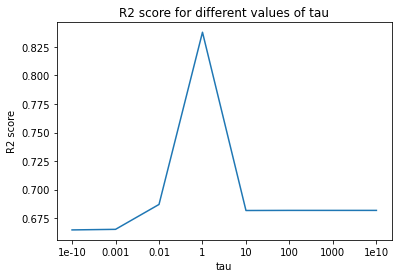

In [13]:
#Getting the tau and their respective R2 scores on test set from above:
tau=['1e-10','0.001','0.01','1','10','100','1000','1e10']
R2=[0.6647,0.6652,0.687,0.8378,0.6817,0.6818,0.6818,0.6818]

#plotting R2 for different tau's
plt.plot(tau,R2)
plt.xlabel('tau')
plt.ylabel('R2 score')
plt.title('R2 score for different values of tau')

**Describing how the expected behaviour for tau-> 0 and tau->infinity as described in answer to Question 2 holds:**

**- We can see that as tau->0, the prediction is based on closest points and is arbitary. Hence, the performance degrades and results in lower R2 scores.**

**- As tau-> infinity, the performance is same as OLS because all the weights are equal as explained in Q2. This results in same R2 score of 0.681 that we got in OLS.**

**- In this case, we see that the performance is best when tau=1.**


**(g) [2pt] Plot a histogram of the target variable. What distribution does the target follow?**


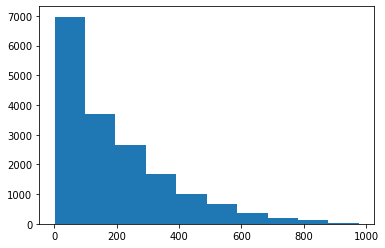

In [ ]:
plt.hist(df_shuffle['cnt']); #e^-x

**The target follows a negative exponential distribution(e^-x).**

**(h) [5pt] Implement the Poisson regression algorithm as describe in Question 2.
Since the maximum likelihood estimate is not solvable in closed form, you will need to implement gradient descent. You may use autograd to compute the gradient of the loss function,
but implement the gradient descent procedure by hand as presented in the tutorial**

In [56]:
def mle_func(w,i):

    x = npy.array(train_features_en[i]).reshape(-1,1)
    
    y = npy.array(train_labels_en[i]).reshape(-1,1)
    
    # defining the negative log likelihood function for poisson regression
    
    output_i = -npy.dot(y, npy.dot(w.T,x)) + npy.exp(npy.dot(w.T,x)) #+ npy.log(np.math.factorial(y))

    return output_i

In [57]:
def loss_func(w):

    l_i = []
    #calculating loss
    for i in range(len(train_features_en)):
      
      l_i.append(mle_func(w, i))
         
    loss_out = npy.sum(l_i)/len(l_i)

    return loss_out

**(i) [3pt] Fit the Poisson model to the data. Report the fraction of explained Tweedie deviance,
also known as the D score, of your model. The D score between the correct target labels y
and the predicted target labels ˆy can be calculated as:**

Hint: you may use sklearn.metrics.d2 tweedie score with power=1.


In [58]:
#Using autograd function for gradient descent
w = npy.zeros(train_features_en.shape[1]) 
learning_rate = 0.2
N_ITER = 50  
training_gradient = autograd.grad(loss_func)

print("Initial Loss:", loss_func(w))

for i in range(N_ITER):
    w -= training_gradient(w)*learning_rate
    print("Iteration {}:".format(i), loss_func(w))

print("Final Loss:", loss_func(w))

Initial Loss: 1.0
Iteration 0: 0.757913342354498
Iteration 1: 0.6663875359337084
Iteration 2: 0.6189297439714542
Iteration 3: 0.5906662352004575
Iteration 4: 0.5723866066509714
Iteration 5: 0.5598760106803359
Iteration 6: 0.5509423045414621
Iteration 7: 0.5443417642621773
Iteration 8: 0.539322683578068
Iteration 9: 0.5354083341322069
Iteration 10: 0.532284727498822
Iteration 11: 0.5297386705589451
Iteration 12: 0.5276217493781978
Iteration 13: 0.5258284749878328
Iteration 14: 0.5242825414245514
Iteration 15: 0.5229279201456261
Iteration 16: 0.5217229376549652
Iteration 17: 0.5206362480593052
Iteration 18: 0.5196440404266092
Iteration 19: 0.5187280690300736
Iteration 20: 0.5178742429465437
Iteration 21: 0.5170716026301451
Iteration 22: 0.5163115684486922
Iteration 23: 0.5155873830671033
Iteration 24: 0.5148936937623786
Iteration 25: 0.5142262369118361
Iteration 26: 0.5135815978591882
Iteration 27: 0.5129570269121559
Iteration 28: 0.512350297494506
Iteration 29: 0.5117595961992515
Iterat

In [ ]:
filehandler = open("w_poisson.pkl","wb")
pickle.dump(w,filehandler)

y_pred = npy.exp(npy.dot(test_features_en, w))

#calculating d2 tweedie score
d2_tweedie_score(test_labels_en, y_pred.reshape(-1,1), power=1)

0.09524696309444058

**The D2 score for poisson regression model is 0.09525.**

**(j) [5pt] For OLS and Poisson regression, report the final weights. Which are the most and least significant
features in each model? Justify your answer. If the feature is categorical, report both the
feature name, as well as the 1-hot index**

In [54]:
def compare_weights(model_name, weights):

    print('Model Name: {}'.format(model_name))

    max_feat = np.argmax(np.abs(weights))
    min_feat = np.argmin(np.abs(weights))

    print('Most Significant Feature: ', cols[max_feat+1],'and its weight is', weights[max_feat] )
    print('Least Significant Feature: ', cols[min_feat+1],'and its weight is', weights[min_feat])
    print('Weights: \n', weights.flatten())

In [45]:
cols = df_encode.columns.tolist()

## OLS:

**Most Significant Feature in OLS:  hr_18**

**Least Significant Feature in OLS:  season_1**

Justifying the answer:

- As per the weights, hr 18 is the most significant feature with a positive correlation of 1.17 with the target. This implies that the count of bikes increases with the presence of categorical feature hr_18. hr_18 represents 6 pm and this is the time that influences the target most.

- season_1(winter) is the least significant feature which has a small negative correlation of -0.02 with the target.  

**Reporting the best weights for OLS below:**

In [55]:
compare_weights("OLS", w_ols)

Model Name: OLS
Most Significant Feature:  hr_18 and its weight is [1.17337946]
Least Significant Feature:  season_1 and its weight is [-0.02512634]
Weights: 
 [-0.86092188  0.08601451  0.19840129  0.23184969  0.25463636 -0.09095207
 -0.02512634 -0.8402455  -0.79613842 -0.8062008  -0.7712766   0.40080123
  0.40169271  0.40789266  0.39820919  0.40879237  0.39024163  0.37521838
  0.3940137   0.4247549   0.40958817  0.38723766  0.39393939  0.78856858
  0.76993087  0.76031257  0.75188832  0.74879744  0.7664752   0.82606464
  0.96678175  1.09903251  0.95453787  0.89757295  0.92481364  0.95833241
  0.95441132  0.93371619  0.95412052  1.0115012   1.17337946  1.14081238
  1.02439728  0.94364594  0.89473032  0.85931821  0.81625881  0.84312823
  0.62052088  0.61963577  0.62571003  0.62211155  0.62501235  0.85410216
 -0.40668902 -0.41820125 -0.47196348 -0.49159829]


## Poisson:

**Most Significant Feature in Poisson: hum**

**Least Significant Feature in Poisson: weathersit_4**

Justifying the answer:

- As per the weights, hum is the most significant feature with a negative correlation of 0.62 with the target. This implies that the count of bikes decreases considerably with the presence of numerical feature hum.

- weathersit_4(Heavy rain/thunderstorms) is the least significant feature which has a small negative correlation of -0.002 with the target. This means that it has least influence on target.  

**Reporting the best weights for Poisson below:**

In [59]:
compare_weights("Poissons", w)

Model Name: Poissons
Most Significant Feature:  hum and its weight is -0.6150161336145409
Least Significant Feature:  weathersit_4 and its weight is -0.00025725923737918616
Weights: 
 [-7.81373587e-02 -4.92846016e-02 -3.68993165e-01 -2.47915561e-01
 -6.15016134e-01 -1.57490600e-01 -3.75711707e-01 -1.57102491e-01
 -8.75107738e-02 -1.97016277e-01 -1.42616513e-01 -1.14084289e-01
 -9.70880063e-02 -7.95597616e-02 -3.28010438e-02 -2.23171894e-02
 -3.08862109e-02 -2.06242955e-02 -2.96119779e-02 -4.68675155e-02
 -8.86502709e-02 -1.12234174e-01 -8.36713058e-02 -9.73479838e-02
 -9.73046988e-02 -9.77072604e-02 -1.00269208e-01 -1.01967170e-01
 -8.14530932e-02 -2.14145023e-02  3.17479345e-02 -2.15222440e-02
 -3.89255295e-02 -2.80042701e-02 -9.32388441e-03 -1.25180980e-02
 -1.89030962e-02 -1.22441971e-02  1.15999679e-02  7.77926583e-02
  6.31010685e-02  1.36860218e-02 -1.94477725e-02 -4.15308672e-02
 -5.81347890e-02 -7.35789286e-02 -2.02061490e-01 -1.07903130e-01
 -8.47305075e-02 -7.97427909e-02 -7.

In [63]:
%%shell
jupyter nbconvert --to html HW_2_CSC2515_all.ipynb

[NbConvertApp] Converting notebook HW_2_CSC2515_all.ipynb to html
[NbConvertApp] Writing 812828 bytes to HW_2_CSC2515_all.html
